# Decision Tree - Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_oversampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

numDimensions = X_test.shape[1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31544, 27)
(13520, 27)
(31544,)
(13520,)


In [6]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="entropy")

In [7]:
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

In [9]:
accText = 'Decision Tree, Oversampled'

In [10]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("../data/external/accuracies.csv")

  Accuracy: 87.99%
 Precision: 82.99%
    Recall: 95.85%
  F1 score: 88.96%
 ROC score: 87.91%


In [11]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[6542  283]
 [1341 5354]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6695
           1       0.83      0.96      0.89      6825

    accuracy                           0.88     13520
   macro avg       0.89      0.88      0.88     13520
weighted avg       0.89      0.88      0.88     13520



In [12]:
features = list(X)
#features

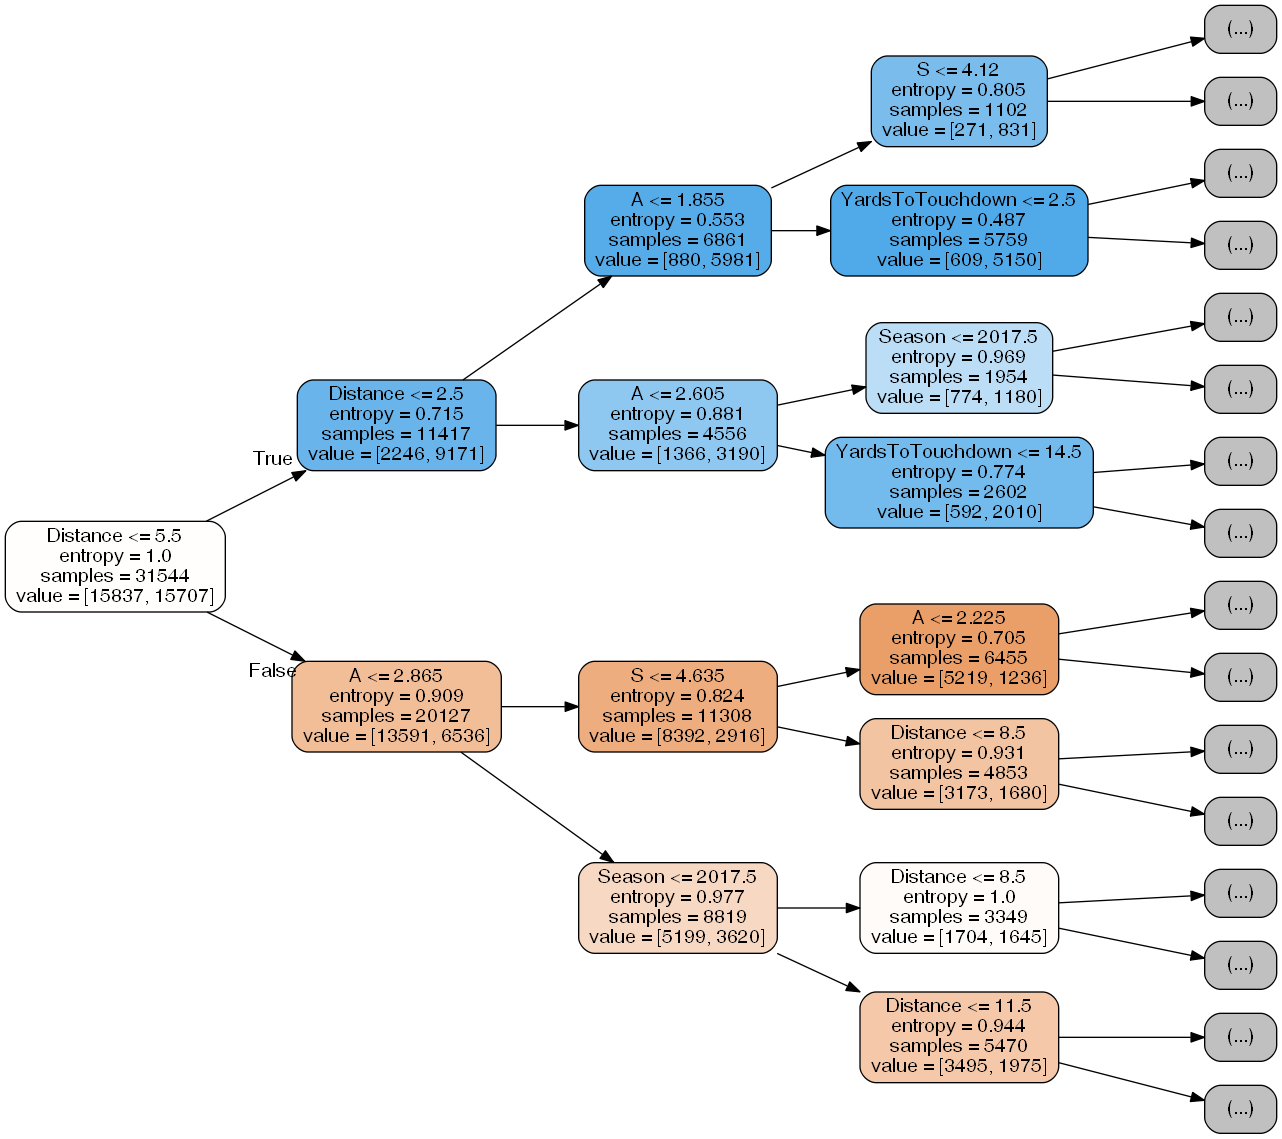

In [32]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, \
                rounded=True, rotate=True, leaves_parallel=True, impurity=True, precision=3, max_depth=3)

import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png(), width=3600, height=7200)

In [14]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [ \
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" \
        for i in tree_.feature \
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
tree_to_code(dtree, features)

def tree(TightEnds, DefendersInTheBox, LineBackers, PlayerHeightInches, IsPossTeamInLead, TurfCode, StadiumTypeCode, DefensiveTackles, Safeties, Y, A, isPlayDirectionLeft, NoseTackles, Quarter, Centers, HomeScoreBeforePlay, OffensiveGuards, Season, Age, TimeSnapDiff, isHomeTeam, Distance, DefensiveEnds, S, Down, Cornerbacks, YardsToTouchdown):
  if Distance <= 5.5:
    if Distance <= 2.5:
      if A <= 1.8550000190734863:
        if S <= 4.120000123977661:
          if A <= 1.5149999856948853:
            if Distance <= 1.5:
              if Y <= 22.445000648498535:
                return [[9. 0.]]
              else:  # if Y > 22.445000648498535
                if Season <= 2017.5:
                  if HomeScoreBeforePlay <= 32.0:
                    if NoseTackles <= 0.5:
                      if HomeScoreBeforePlay <= 18.5:
                        if Y <= 30.914999961853027:
                          if isPlayDirectionLeft <= 0.5:
                            if HomeScoreBeforePlay <

                        else:  # if NoseTackles > 0.5
                          if A <= 1.9049999713897705:
                            return [[0. 2.]]
                          else:  # if A > 1.9049999713897705
                            return [[3. 0.]]
                      else:  # if S > 4.079999923706055
                        return [[ 0. 19.]]
                    else:  # if StadiumTypeCode > 2.5
                      if Age <= 29.5:
                        return [[4. 0.]]
                      else:  # if Age > 29.5
                        return [[0. 2.]]
                else:  # if S > 4.9649999141693115
                  return [[ 0. 42.]]
              else:  # if PlayerHeightInches > 70.5
                if Age <= 22.5:
                  return [[7. 0.]]
                else:  # if Age > 22.5
                  if S <= 5.550000190734863:
                    if YardsToTouchdown <= 12.5:
                      return [[ 0. 12.]]
                    else:  # if YardsToTou

                                      return [[ 0. 15.]]
                                    else:  # if S > 3.884999990463257
                                      if HomeScoreBeforePlay <= 11.5:
                                        if S <= 4.140000104904175:
                                          return [[3. 0.]]
                                        else:  # if S > 4.140000104904175
                                          return [[ 0. 16.]]
                                      else:  # if HomeScoreBeforePlay > 11.5
                                        return [[5. 0.]]
                                  else:  # if OffensiveGuards > 2.5
                                    if S <= 4.565000057220459:
                                      return [[4. 0.]]
                                    else:  # if S > 4.565000057220459
                                      return [[0. 1.]]
                            else:  # if Age > 28.5
                              return [[4. 0.]]

                              if TightEnds <= 2.5:
                                return [[4. 0.]]
                              else:  # if TightEnds > 2.5
                                return [[0. 2.]]
                    else:  # if StadiumTypeCode > 2.5
                      return [[0. 7.]]
                  else:  # if DefensiveTackles > 0.5
                    if S <= 3.8850001096725464:
                      if Age <= 34.5:
                        if Age <= 21.5:
                          if HomeScoreBeforePlay <= 6.5:
                            return [[0. 2.]]
                          else:  # if HomeScoreBeforePlay > 6.5
                            return [[4. 0.]]
                        else:  # if Age > 21.5
                          return [[75.  0.]]
                      else:  # if Age > 34.5
                        return [[0. 2.]]
                    else:  # if S > 3.8850001096725464
                      if TightEnds <= 0.5:
                        if S <= 4.

                else:  # if YardsToTouchdown > 27.5
                  if DefendersInTheBox <= 7.5:
                    if Y <= 30.174999237060547:
                      if Y <= 29.969999313354492:
                        if YardsToTouchdown <= 50.5:
                          if DefensiveEnds <= 0.5:
                            return [[4. 0.]]
                          else:  # if DefensiveEnds > 0.5
                            if IsPossTeamInLead <= 0.5:
                              if OffensiveGuards <= 1.5:
                                if S <= 5.579999923706055:
                                  return [[4. 0.]]
                                else:  # if S > 5.579999923706055
                                  return [[0. 2.]]
                              else:  # if OffensiveGuards > 1.5
                                if A <= 2.5700000524520874:
                                  if StadiumTypeCode <= 3.5:
                                    return [[ 0. 25.]]
                

                        return [[0. 3.]]
                      else:  # if DefendersInTheBox > 4.0
                        if A <= 2.834999918937683:
                          if PlayerHeightInches <= 70.5:
                            if HomeScoreBeforePlay <= 20.5:
                              if Cornerbacks <= 2.5:
                                return [[15.  0.]]
                              else:  # if Cornerbacks > 2.5
                                if S <= 4.855000019073486:
                                  if YardsToTouchdown <= 33.5:
                                    if S <= 4.835000038146973:
                                      return [[8. 0.]]
                                    else:  # if S > 4.835000038146973
                                      return [[0. 1.]]
                                  else:  # if YardsToTouchdown > 33.5
                                    if OffensiveGuards <= 1.5:
                                      return [[3. 0.]]
                

                                            return [[6. 0.]]
                                          else:  # if TightEnds > 2.5
                                            return [[0. 1.]]
                                        else:  # if Y > 28.885000228881836
                                          if HomeScoreBeforePlay <= 14.0:
                                            if PlayerHeightInches <= 71.5:
                                              return [[ 0. 10.]]
                                            else:  # if PlayerHeightInches > 71.5
                                              return [[1. 0.]]
                                          else:  # if HomeScoreBeforePlay > 14.0
                                            return [[1. 0.]]
                                      else:  # if A > 3.6750000715255737
                                        return [[8. 0.]]
                                  else:  # if DefensiveTackles > 2.5
                                 

                                                  return [[5. 0.]]
                                                else:  # if Age > 26.5
                                                  return [[0. 4.]]
                                              else:  # if A > 3.399999976158142
                                                if Age <= 30.0:
                                                  return [[ 0. 18.]]
                                                else:  # if Age > 30.0
                                                  return [[1. 0.]]
                                          else:  # if S > 4.055000066757202
                                            return [[7. 0.]]
                                      else:  # if Y > 30.869999885559082
                                        if S <= 4.169999837875366:
                                          return [[24.  0.]]
                                        else:  # if S > 4.169999837875366
                                

In [15]:
# The score method returns the accuracy of the model
score = dtree.score(X_test, y_test)
print(score)

0.8798816568047337


In [33]:
# List of values to try for max_depth:
max_depth_range = list(range(1, numDimensions + 1))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
pd.DataFrame(accuracy).head(10)

,0
0,0.721746
1,0.721746
2,0.723669
3,0.730695
4,0.734246
5,0.738462
6,0.741642
7,0.747411
8,0.751997
9,0.761391


In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.to_csv("../data/external/importances.csv")
importances.head(5)

,feature,importance
21,Distance,0.247
10,A,0.108
23,S,0.105
9,Y,0.087
26,YardsToTouchdown,0.071
